<a href="https://colab.research.google.com/github/Bangkit-C22-PS353-Capstone-Project/Bangkit-C22-PS353-MachineLearning/blob/main/Coba_Seattle_Temperature_ML_Model_with_CNN_RNN_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install tensorflow, Import that smooth library

In [2]:
# import that smooth library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import csv

import tensorflow as tf
print(tf.__version__)
print(np.__version__)

2.8.0
1.21.6


# Download the Data

ini yg di donlod dataset yg udah jadi, jadi tinggal di visualisasikan aja

In [109]:
# prepare the dataset, 
# download data from google drive
# https://drive.google.com/file/d/1dM4NT4-mEbAH1kPUH3uwgKDWfRRKw_N9/view?usp=sharing

!gdown --id 1dM4NT4-mEbAH1kPUH3uwgKDWfRRKw_N9

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dM4NT4-mEbAH1kPUH3uwgKDWfRRKw_N9
To: /content/Seattle Temperature 1995-2020 (2).csv
100% 295k/295k [00:00<00:00, 127MB/s]


# Preprocess the data

ini preprocess dataset yg city temperature all world si jadi abaikan aja

In [88]:
# read the dataset and convert into csv
dataset = pd.read_csv('city_temperature.csv')
# show me that csv
print(dataset)

                Region  Country                   State                  City  \
0               Africa  Algeria                     NaN               Algiers   
1               Africa  Algeria                     NaN               Algiers   
2               Africa  Algeria                     NaN               Algiers   
3               Africa  Algeria                     NaN               Algiers   
4               Africa  Algeria                     NaN               Algiers   
...                ...      ...                     ...                   ...   
2906322  North America       US  Additional Territories  San Juan Puerto Rico   
2906323  North America       US  Additional Territories  San Juan Puerto Rico   
2906324  North America       US  Additional Territories  San Juan Puerto Rico   
2906325  North America       US  Additional Territories  San Juan Puerto Rico   
2906326  North America       US  Additional Territories  San Juan Puerto Rico   

         Month  Day  Year  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.



In [89]:
# checking the datatypes
print(dataset[dataset['City'] == 'Seattle'])

                Region Country       State     City  Month  Day  Year  \
2806890  North America      US  Washington  Seattle      1    1  1995   
2806891  North America      US  Washington  Seattle      1    2  1995   
2806892  North America      US  Washington  Seattle      1    3  1995   
2806893  North America      US  Washington  Seattle      1    4  1995   
2806894  North America      US  Washington  Seattle      1    5  1995   
...                ...     ...         ...      ...    ...  ...   ...   
2816150  North America      US  Washington  Seattle      5    9  2020   
2816151  North America      US  Washington  Seattle      5   10  2020   
2816152  North America      US  Washington  Seattle      5   11  2020   
2816153  North America      US  Washington  Seattle      5   12  2020   
2816154  North America      US  Washington  Seattle      5   13  2020   

         AvgTemperature  
2806890            41.3  
2806891            39.8  
2806892            44.5  
2806893            

In [90]:
dataset2 = dataset[['Country', 'City', 'Month', 'Day', 'Year', 'AvgTemperature']].copy()

In [91]:
new_dataset = dataset2[dataset2['Country'] == 'US']

In [92]:
df = new_dataset[new_dataset['City'] == 'Seattle']
print(df)

        Country     City  Month  Day  Year  AvgTemperature
2806890      US  Seattle      1    1  1995            41.3
2806891      US  Seattle      1    2  1995            39.8
2806892      US  Seattle      1    3  1995            44.5
2806893      US  Seattle      1    4  1995            42.4
2806894      US  Seattle      1    5  1995            39.2
...         ...      ...    ...  ...   ...             ...
2816150      US  Seattle      5    9  2020            73.2
2816151      US  Seattle      5   10  2020            75.8
2816152      US  Seattle      5   11  2020            68.6
2816153      US  Seattle      5   12  2020            56.7
2816154      US  Seattle      5   13  2020            55.0

[9265 rows x 6 columns]


In [93]:
df.reset_index(inplace = True)
print(df)

        index Country     City  Month  Day  Year  AvgTemperature
0     2806890      US  Seattle      1    1  1995            41.3
1     2806891      US  Seattle      1    2  1995            39.8
2     2806892      US  Seattle      1    3  1995            44.5
3     2806893      US  Seattle      1    4  1995            42.4
4     2806894      US  Seattle      1    5  1995            39.2
...       ...     ...      ...    ...  ...   ...             ...
9260  2816150      US  Seattle      5    9  2020            73.2
9261  2816151      US  Seattle      5   10  2020            75.8
9262  2816152      US  Seattle      5   11  2020            68.6
9263  2816153      US  Seattle      5   12  2020            56.7
9264  2816154      US  Seattle      5   13  2020            55.0

[9265 rows x 7 columns]


In [94]:
df.drop("index", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
df.reset_index(inplace = True)
print(df)

      index Country     City  Month  Day  Year  AvgTemperature
0         0      US  Seattle      1    1  1995            41.3
1         1      US  Seattle      1    2  1995            39.8
2         2      US  Seattle      1    3  1995            44.5
3         3      US  Seattle      1    4  1995            42.4
4         4      US  Seattle      1    5  1995            39.2
...     ...     ...      ...    ...  ...   ...             ...
9260   9260      US  Seattle      5    9  2020            73.2
9261   9261      US  Seattle      5   10  2020            75.8
9262   9262      US  Seattle      5   11  2020            68.6
9263   9263      US  Seattle      5   12  2020            56.7
9264   9264      US  Seattle      5   13  2020            55.0

[9265 rows x 7 columns]


In [96]:
print(type(df['Month'].dtype))
print(type(df['Day'].dtype))
print(type(df['Year'].dtype))

<class 'numpy.dtype[int64]'>
<class 'numpy.dtype[int64]'>
<class 'numpy.dtype[int64]'>


In [97]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['Month'].astype(str) + ' ' + df['Day'].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
df.drop("Month", axis=1, inplace=True)
df.drop("Day", axis=1, inplace=True)
df.drop("Year", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Nah yg ini ya dataset yg final

In [133]:
print(df)

     Country     City  AvgTemperature       Date
0         US  Seattle            41.3 1995-01-01
1         US  Seattle            39.8 1995-01-02
2         US  Seattle            44.5 1995-01-03
3         US  Seattle            42.4 1995-01-04
4         US  Seattle            39.2 1995-01-05
...      ...      ...             ...        ...
9260      US  Seattle            73.2 2020-05-09
9261      US  Seattle            75.8 2020-05-10
9262      US  Seattle            68.6 2020-05-11
9263      US  Seattle            56.7 2020-05-12
9264      US  Seattle            55.0 2020-05-13

[9265 rows x 4 columns]


# Visualize the Dataset

In [100]:
# put x and y axis respectively
fig = px.line(df, x="Date", y='AvgTemperature')

# this code is to add the range slider so we can see better
fig.update_xaxes(rangeslider_visible=True)

# for showing the plot
fig.show()

# Setting up the plot function for plotting

In [101]:
def plot_series(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

# Preview the Dataset

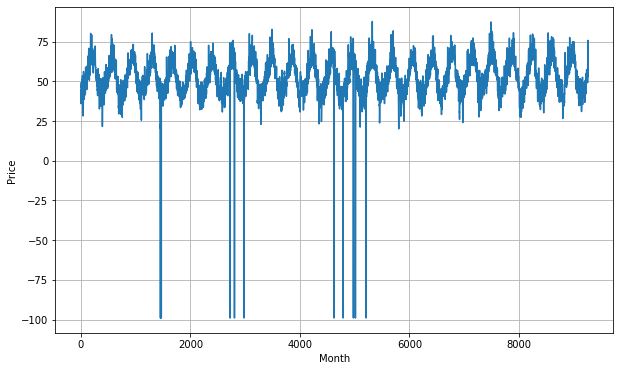

In [111]:
# Initialize lists
time_step = []
price = []

# Open CSV file
with open('./Seattle Temperature 1995-2020 (2).csv') as csvfile:
  
  # Initialize reader
  reader = csv.reader(csvfile, delimiter=',')
  
  # Skip the first line
  next(reader)
  
  # Append row and sunspot number to lists
  for row in reader:
    time_step.append(int(row[0]))
    price.append(float(row[3]))

# Convert lists to numpy arrays
time = np.array(time_step)
series = np.array(price)

# Preview the data
plot_series(time, series, xlabel='Month', ylabel='Price')

In [112]:
print(type(series))
print(type(time))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Split the Dataset

In [113]:
# Define the split time
split_time = 8000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

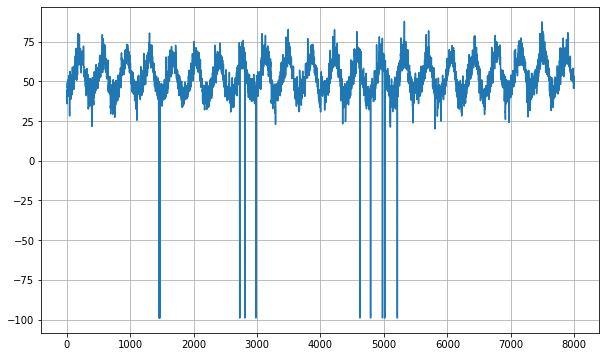

In [114]:
# Plot the train set
plot_series(time_train, x_train)

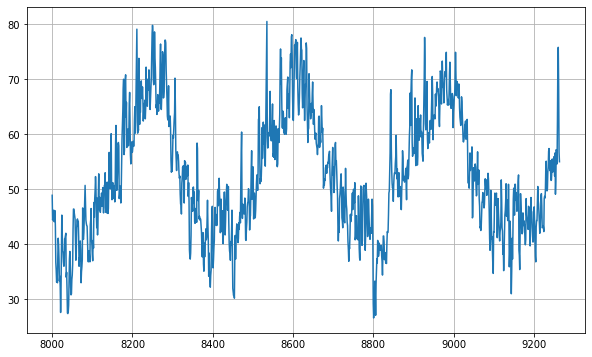

In [115]:
# Plot the validation set
plot_series(time_valid, x_valid)

# Prepare Features and Labels

In [116]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

As mentioned in the lectures, if your results don't good, you can try tweaking the parameters here and see if the model will learn better.

In [117]:
# Parameters
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Build the Model
You've seen these layers before and here is how it's looks like when combined.

In [118]:
# Build the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

 # Print the model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 30, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 30)                1950      
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 lambda (Lambda)             (None, 1)                 0

In [119]:
# Get initial weights
init_weights = model.get_weights()

In [120]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
250/250 [==============================] - 8s 10ms/step - loss: 10.2417 - lr: 1.0000e-08
Epoch 2/100
250/250 [==============================] - 2s 9ms/step - loss: 6.7945 - lr: 1.1220e-08
Epoch 3/100
250/250 [==============================] - 2s 9ms/step - loss: 5.8323 - lr: 1.2589e-08
Epoch 4/100
250/250 [==============================] - 2s 9ms/step - loss: 4.5321 - lr: 1.4125e-08
Epoch 5/100
250/250 [==============================] - 2s 9ms/step - loss: 4.2222 - lr: 1.5849e-08
Epoch 6/100
250/250 [==============================] - 2s 9ms/step - loss: 4.1107 - lr: 1.7783e-08
Epoch 7/100
250/250 [==============================] - 2s 9ms/step - loss: 4.0312 - lr: 1.9953e-08
Epoch 8/100
250/250 [==============================] - 2s 9ms/step - loss: 3.9875 - lr: 2.2387e-08
Epoch 9/100
250/250 [==============================] - 2s 9ms/step - loss: 3.9381 - lr: 2.5119e-08
Epoch 10/100
250/250 [==============================] - 2s 9ms/step - loss: 3.8931 - lr: 2.8184e-08
Epoch 1

(1e-08, 0.001, 0.0, 100.0)

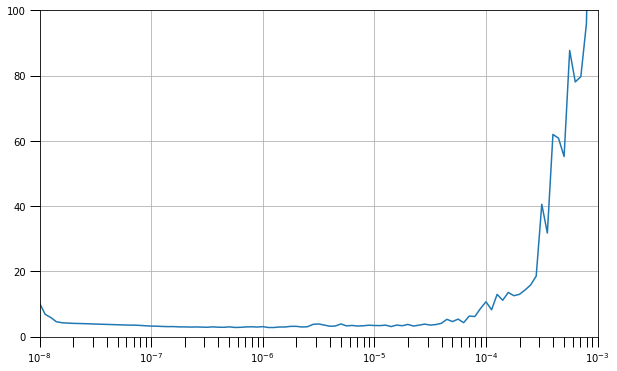

In [121]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 100])

## Train the Model

Now you can proceed to reset and train the model. It is set for 100 epochs in the cell below but feel free to increase it if you want. Laurence got his results in the lectures after 500.

In [122]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [123]:
# Set the learning rate
learning_rate = 8e-7

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [124]:
# Train the model
history = model.fit(train_set,epochs=100)

Epoch 1/100
250/250 [==============================] - 5s 10ms/step - loss: 4.6331 - mae: 5.1076
Epoch 2/100
250/250 [==============================] - 2s 9ms/step - loss: 3.4871 - mae: 3.9565
Epoch 3/100
250/250 [==============================] - 2s 9ms/step - loss: 3.2545 - mae: 3.7221
Epoch 4/100
250/250 [==============================] - 2s 9ms/step - loss: 2.9375 - mae: 3.4029
Epoch 5/100
250/250 [==============================] - 2s 9ms/step - loss: 2.9308 - mae: 3.3942
Epoch 6/100
250/250 [==============================] - 3s 10ms/step - loss: 2.8510 - mae: 3.3149
Epoch 7/100
250/250 [==============================] - 3s 10ms/step - loss: 2.9079 - mae: 3.3730
Epoch 8/100
250/250 [==============================] - 2s 10ms/step - loss: 2.7782 - mae: 3.2405
Epoch 9/100
250/250 [==============================] - 2s 9ms/step - loss: 2.6930 - mae: 3.1579
Epoch 10/100
250/250 [==============================] - 2s 9ms/step - loss: 2.6927 - mae: 3.1561
Epoch 11/100
250/250 [=============

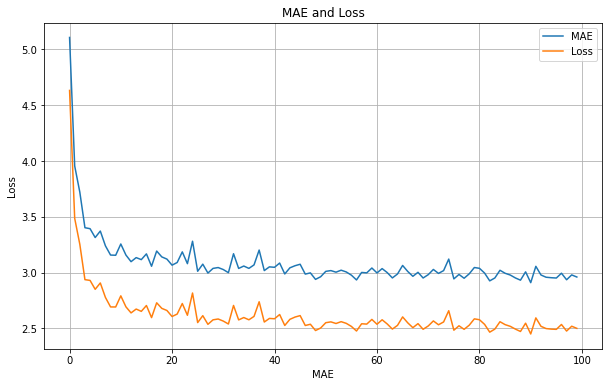

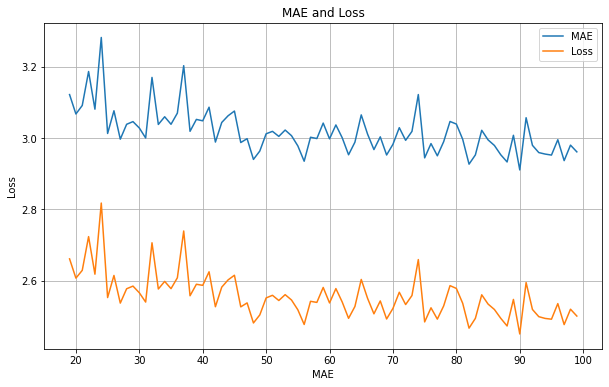

In [125]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, loss), 
    title='MAE and Loss', 
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='MAE and Loss', 
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

In [126]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions on the entire dataset
    forecast = model.predict(dataset)
    
    return forecast

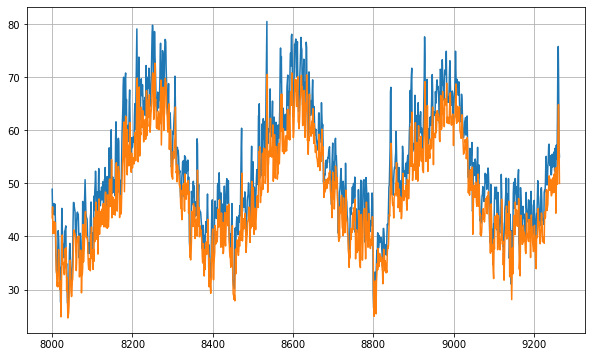

In [127]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [128]:
# Compute the MAE
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

4.668114


In [129]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=10)

Epoch 1/10
250/250 [==============================] - 5s 9ms/step - loss: 2.4414 - mae: 2.8984
Epoch 2/10
250/250 [==============================] - 2s 9ms/step - loss: 2.3735 - mae: 2.8310
Epoch 3/10
250/250 [==============================] - 2s 9ms/step - loss: 2.3741 - mae: 2.8315
Epoch 4/10
250/250 [==============================] - 2s 9ms/step - loss: 2.3753 - mae: 2.8333
Epoch 5/10
250/250 [==============================] - 2s 9ms/step - loss: 2.3759 - mae: 2.8335
Epoch 6/10
250/250 [==============================] - 3s 11ms/step - loss: 2.3778 - mae: 2.8340
Epoch 7/10
250/250 [==============================] - 2s 9ms/step - loss: 2.3858 - mae: 2.8435
Epoch 8/10
250/250 [==============================] - 2s 9ms/step - loss: 2.3786 - mae: 2.8355
Epoch 9/10
250/250 [==============================] - 2s 9ms/step - loss: 2.3733 - mae: 2.8313
Epoch 10/10
250/250 [==============================] - 2s 9ms/step - loss: 2.3754 - mae: 2.8329


In [130]:
# Set the initial learning rate
initial_learning_rate=1e-7

# Define the scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=400,
    decay_rate=0.96,
    staircase=True)

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=40)

Epoch 1/40
250/250 [==============================] - 5s 10ms/step - loss: 2.3732 - mae: 2.8305
Epoch 2/40
250/250 [==============================] - 2s 9ms/step - loss: 2.3802 - mae: 2.8385
Epoch 3/40
250/250 [==============================] - 3s 10ms/step - loss: 2.3707 - mae: 2.8281
Epoch 4/40
250/250 [==============================] - 2s 9ms/step - loss: 2.3738 - mae: 2.8314
Epoch 5/40
250/250 [==============================] - 2s 9ms/step - loss: 2.3731 - mae: 2.8298
Epoch 6/40
250/250 [==============================] - 2s 9ms/step - loss: 2.3731 - mae: 2.8308
Epoch 7/40
250/250 [==============================] - 2s 9ms/step - loss: 2.3720 - mae: 2.8309
Epoch 8/40
250/250 [==============================] - 2s 9ms/step - loss: 2.3683 - mae: 2.8270
Epoch 9/40
250/250 [==============================] - 2s 9ms/step - loss: 2.3722 - mae: 2.8295
Epoch 10/40
250/250 [==============================] - 2s 9ms/step - loss: 2.3733 - mae: 2.8312
Epoch 11/40
250/250 [==========================

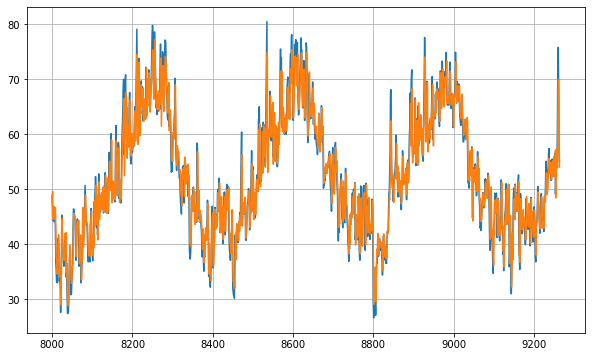

In [131]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [132]:
# Compute the MAE
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

2.5929363